#### Home Credit Default

*Goal

The historical loan application is used data to predict probability of replaying  a loan

*Supervised classification task

<br>

#### Data(Home Credit)

- application_train/application_test

   - main data: each loan application

   - Every loan: SK_ID_CURR

   - Target : 0 or 1

- bureau

   - Multiple previous of client credits 

- bureau_balance

   - monthly data of previous credits

   - rows

- previous_application

   - previous loans data
   
   - feature: SK_ID_PREV

- POS_CASH_BALANCE

   - monthly previous of sale or cash loan

- credit_card_bbalance

   - monthly data of credit cards clients

   - single cards in many rows

- installments_payment

   - payment history for previous loans

   - made payment and missed payment

<br>

#### Metric


**ROC AUC**

- ROC: True positive rate versus the false positive rate

- AUC: the area under the ROC curve

- ROC AUC 

   - have probability between 0 and 1

   - represent a better model performance

   - reflect the performance of a classifier


#### Code

In [1]:
# imports library
## numpy and pandas for data manipulation

import numpy as np
import pandas as pd

#sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

#File system manangment

import os

#Suppress warnings

import warnings
warnings.filterwarnings('ignore')

#matplotlib and seaborn for plotting

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connect drive

from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [3]:
#Training data

app_train = pd.read_csv('./gdrive/MyDrive//home-credit-default-risk/application_train.csv')
print('Train data shape:', app_train.shape)
app_train.head(10)

Train data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Test data : target
app_test = pd.read_csv('./gdrive/MyDrive//home-credit-default-risk/application_test.csv')
print('Test data shape:', app_test.shape)
app_test.head(10)

Test data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### EDÅ

- Calculate statistics

- Make figures

   - trends, anomalies, patterns or relationships

- Inform modeling choices

- Find areas of data

#### Examine the Distribution of the Target Column

- Prediction of Target 

   - 0: the loan was repaid on time

   - 1: Indicating the client had payment difficulties

- Examine the number of loans

In [6]:
#How many 0 and 1

app_train['TARGET'].value_counts()

#It is too imbalanced class

0    282686
1     24825
Name: TARGET, dtype: int64

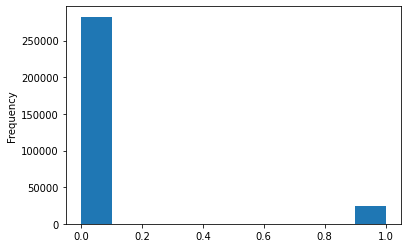

In [7]:
#Graph
app_train['TARGET'].astype(int).plot.hist();
#Almostly, the loans were paid on time

Need to sophisticated machine learning models for Reflecting this imbalance by weighting the classes of the data

### Examine Missing Values

The number and percentage of missing values in each column

In [10]:
#Function to calculate missing values by column #Funct

def missing_values_table(df):
    #Total missing values
    mis_val = df.isnull().sum()

    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    #Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    #Print some summary information

    print(mis_val)
    print(mis_val_percent)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    
    #Return the dataframe with missing information
    return mis_val_table_ren_columns


In [11]:
#Missing values statistics

missing_values = missing_values_table(app_train)
missing_values.head(20)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### How to use these values

- Be bulit machine learning models by missing values

- Use XGBoost

   - handle missing values with no need for imputation

- Drop columns: high percentage of missing values

### Column Types

- The number of columns of each data type

- Numeric variables(discrete or continuous)

   - int64

   - float64

- Categorical features

   - Object columns (like string)

In [12]:
#Number of each type of column

app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
#Number of unique classes in each object column

app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

#Most of the categorical variables have small number of unique entries
#We wil need to find a way to deal with these categorical variables!

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64